### Feature Selection
* 특징 선택
* 큰 데이터 : 데이터의 갯수가 많은 경우, 특징의 종류가 많은 경우

In [1]:
import pandas as pd
import numpy as np
import pickle
with open('boston_data.pkl', 'rb') as f:
    obj = pickle.load(f)
x_train, x_test, y_train, y_test = obj

In [2]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [15]:
# VarianceThreshold
# 분산 기준치에 의해 선택
# 독립변수의 값이 종속변수의 값에 비해 변화량이 적으면, 종속변수의 분류에 도움이 안될 가능성이 높음
from sklearn.feature_selection import VarianceThreshold

# VarianceThreshold보다 낮은 특징 제거
# VarianceThreshold보다 낮다 -> 값 중 같은 값이 많다는 의미(예:거의 0으로 채워진 경우)
fs = VarianceThreshold(4)
x_train_sel = fs.fit_transform(x_train)
x_test_sel = fs.transform(x_test)

In [16]:
x_train.shape

(379, 13)

In [17]:
x_train_sel.shape

(379, 10)

In [6]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
269,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44


In [18]:
# 하나의 변수로만 사용해서 예측모델을 만들어 가장 성능이 높은 변수를 선택
# chi2 : 카이제곱 검정 통계량
# f_classif : ANOVA F검정 통계량
# mutual_info_classif : 상호정보량 (mutual information)
# f_regression : 회귀
from sklearn.feature_selection import SelectKBest, f_regression

sb = SelectKBest(score_func=f_regression)
x_train_sel2 = sb.fit_transform(x_train, y_train)
x_test_sel2 = sb.transform(x_test)
x_train_sel2.shape

(379, 10)

In [20]:
# 모델을 이용해서 특징 파악
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

model = ExtraTreesRegressor(n_estimators=500)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

9.892774046299259

In [21]:
model.feature_importances_

array([0.02756937, 0.0042985 , 0.05333257, 0.00504202, 0.03975341,
       0.31189145, 0.01815464, 0.02820376, 0.0249395 , 0.05959578,
       0.05583895, 0.01750906, 0.353871  ])

In [22]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
269,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44


In [23]:
# 특징의 중요도 그래프 시각화
idx = np.argsort(model.feature_importances_)
idx

array([ 1,  3, 11,  6,  8,  0,  7,  4,  2, 10,  9,  5, 12], dtype=int64)

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

names = load_boston().feature_names[idx]
names

array(['ZN', 'CHAS', 'B', 'AGE', 'RAD', 'CRIM', 'DIS', 'NOX', 'INDUS',
       'PTRATIO', 'TAX', 'RM', 'LSTAT'], dtype='<U7')

In [25]:
values = model.feature_importances_[idx]
values

array([0.0042985 , 0.00504202, 0.01750906, 0.01815464, 0.0249395 ,
       0.02756937, 0.02820376, 0.03975341, 0.05333257, 0.05583895,
       0.05959578, 0.31189145, 0.353871  ])

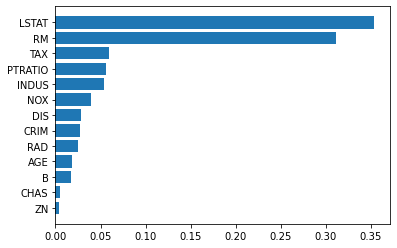

In [26]:
plt.barh(names, values)
plt.show()